### Bike Sharing Prediction - Assignment Solution

The solution is divided into the following sections:<br>

1. Data understanding and exploration<br>
2. Data cleaning<br>
3. Data preparation<br>
4. Model building and evaluation<br>

###  1. Data understanding and exploration

First we have to import the required libraries and have a look at the dataset and understand the size, attribute names etc.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler  
import warnings
warnings.filterwarnings('ignore')

import statsmodels
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


In [2]:
# Reading the dataset
data= pd.read_csv("day.csv")

In [3]:
data.shape

(730, 16)

In [4]:
# Summary of the dataset: 730 rows, 16 columns, no null values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
instant       730 non-null int64
dteday        730 non-null object
season        730 non-null int64
yr            730 non-null int64
mnth          730 non-null int64
holiday       730 non-null int64
weekday       730 non-null int64
workingday    730 non-null int64
weathersit    730 non-null int64
temp          730 non-null float64
atemp         730 non-null float64
hum           730 non-null float64
windspeed     730 non-null float64
casual        730 non-null int64
registered    730 non-null int64
cnt           730 non-null int64
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [5]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [6]:
# Let's take a look at the first few rows
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [7]:
data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


#### Understanding the Data Dictionary

The data dictionary contains the meaning of various attributes; some non-obvious ones are:

In [8]:
data['season'].astype('category').value_counts()

3    188
2    184
1    180
4    178
Name: season, dtype: int64

In [9]:
## Weathersit 1 donotes a sunny/partly coludy/ clear sky day and the demand on bike share is quite high on those days
data['weathersit'].astype('category').value_counts()

1    463
2    246
3     21
Name: weathersit, dtype: int64

#### Exploratory Data Analysis

To perform linear regression, the (numeric) target variable should be linearly related to at least one another numeric variable. Let's see whether that's true in this case.

We'll first subset the list of all (independent) numeric variables, and then make a pairwise plot.

#### Understanding Correlation 

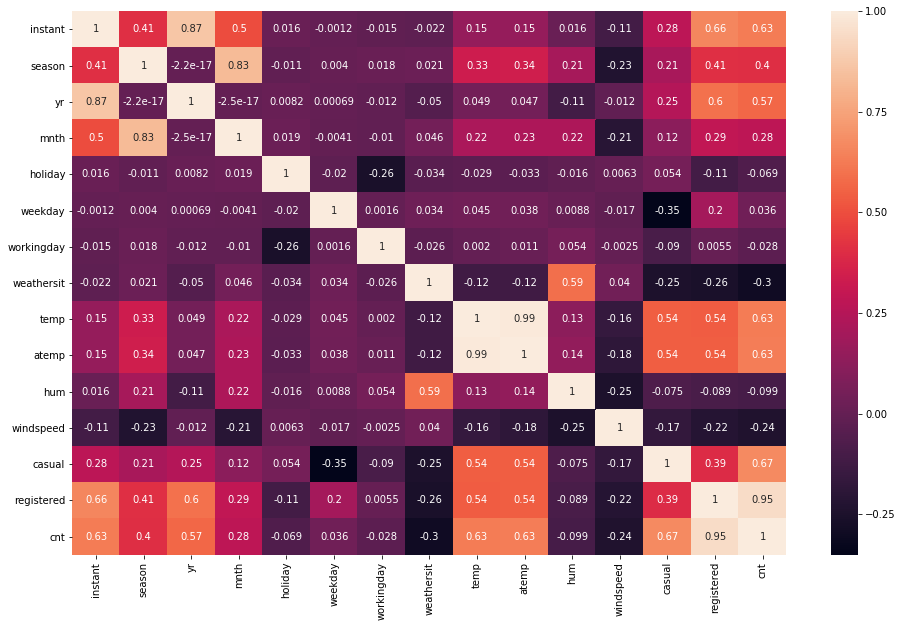

In [10]:
plt.figure(figsize=(16,10))
sns.heatmap(data.corr(),annot=True)

#### Insight:

The heatmap shows some useful insights:

Correlation of Count with independent variables:

- It can be see that "Temp" and "Atemp" has a very strong correlation with the Count of the Bike share. Followed by "Year" and"seasonn"

Correlation among independent variables:

- It can be see that "Month" and "Season" are highly correlated. As every season can have a couple of months falling 
under them so it is very safe to drop the month column

- Also, it can be see that Temp and atemp are highly correlated. 


Thus, while building the model, we'll have to pay attention to multicollinearity.

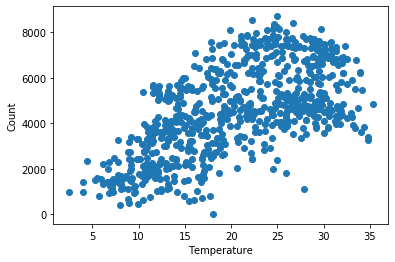

In [11]:
plt.scatter(x=data["temp"],y=data["cnt"])
plt.xlabel("Temperature",fontdict={"fontsize":10,'fontweight':5, 'color':"Black"})
plt.ylabel("Count",fontdict={"fontsize":10,'fontweight':5, 'color':"Black"})
plt.show()

<Figure size 1440x720 with 0 Axes>

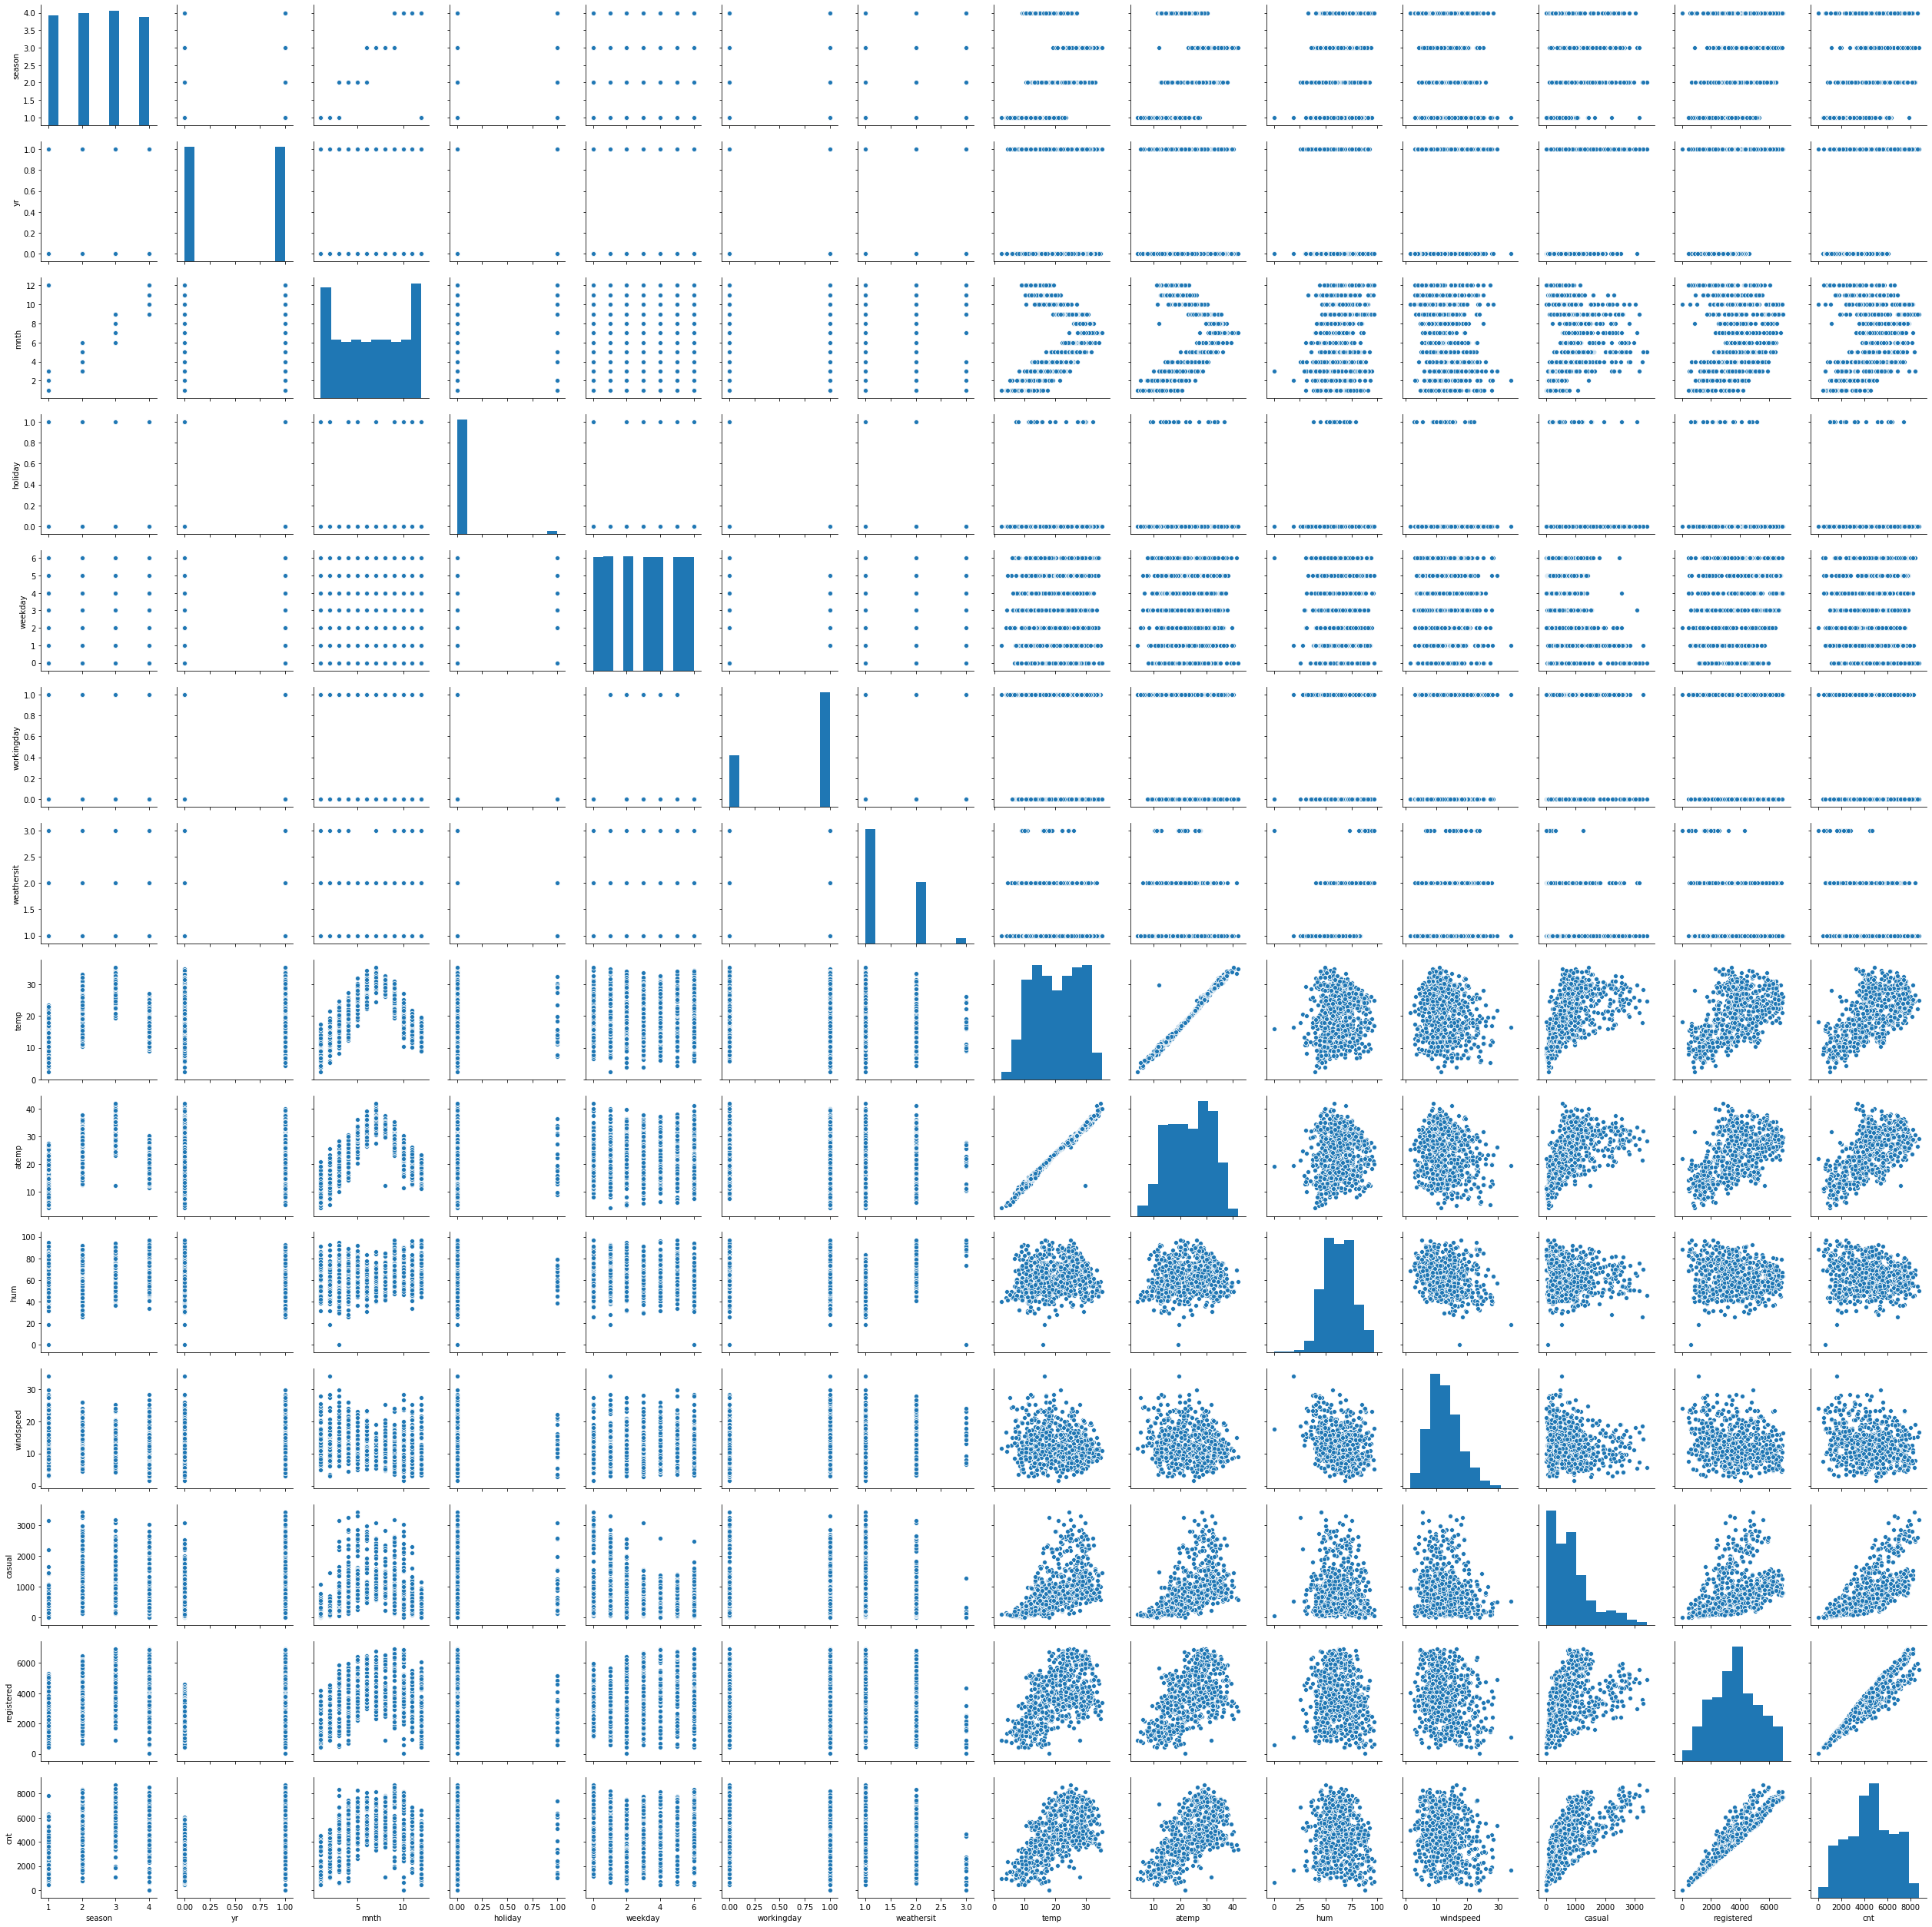

In [12]:
# All numeric (float and int) variables in the dataset
data_numeric = data.select_dtypes(include=['float64', 'int64'])
data_numeric.head()
data_numeric = data_numeric.drop(['instant'], axis=1)
plt.figure(figsize=(20, 10))
sns.pairplot(data_numeric)
plt.show()

This is quite hard to read, and we can rather plot correlations between variables. Also, a heatmap is pretty useful to visualise multiple correlations in one plot.

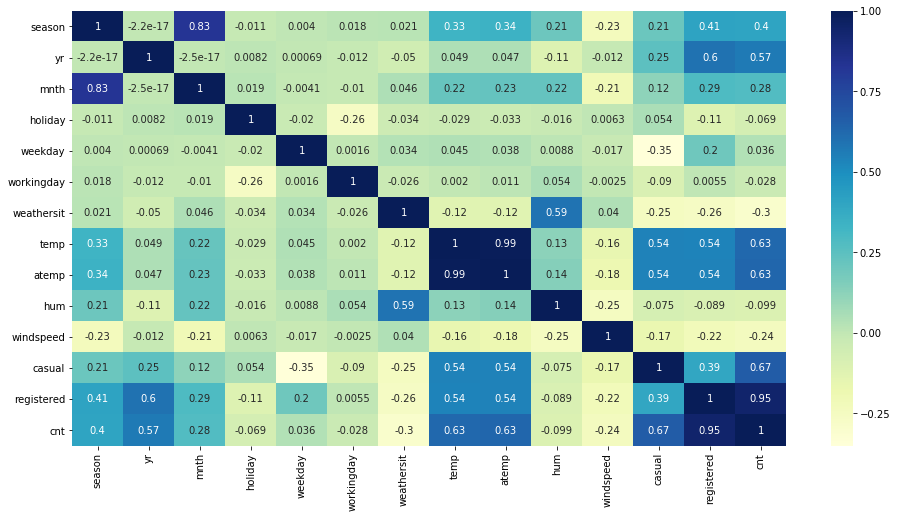

In [13]:
plt.figure(figsize=(16,8))

# Heatmap
sns.heatmap(data_numeric.corr(), cmap="YlGnBu", annot=True)
plt.show()

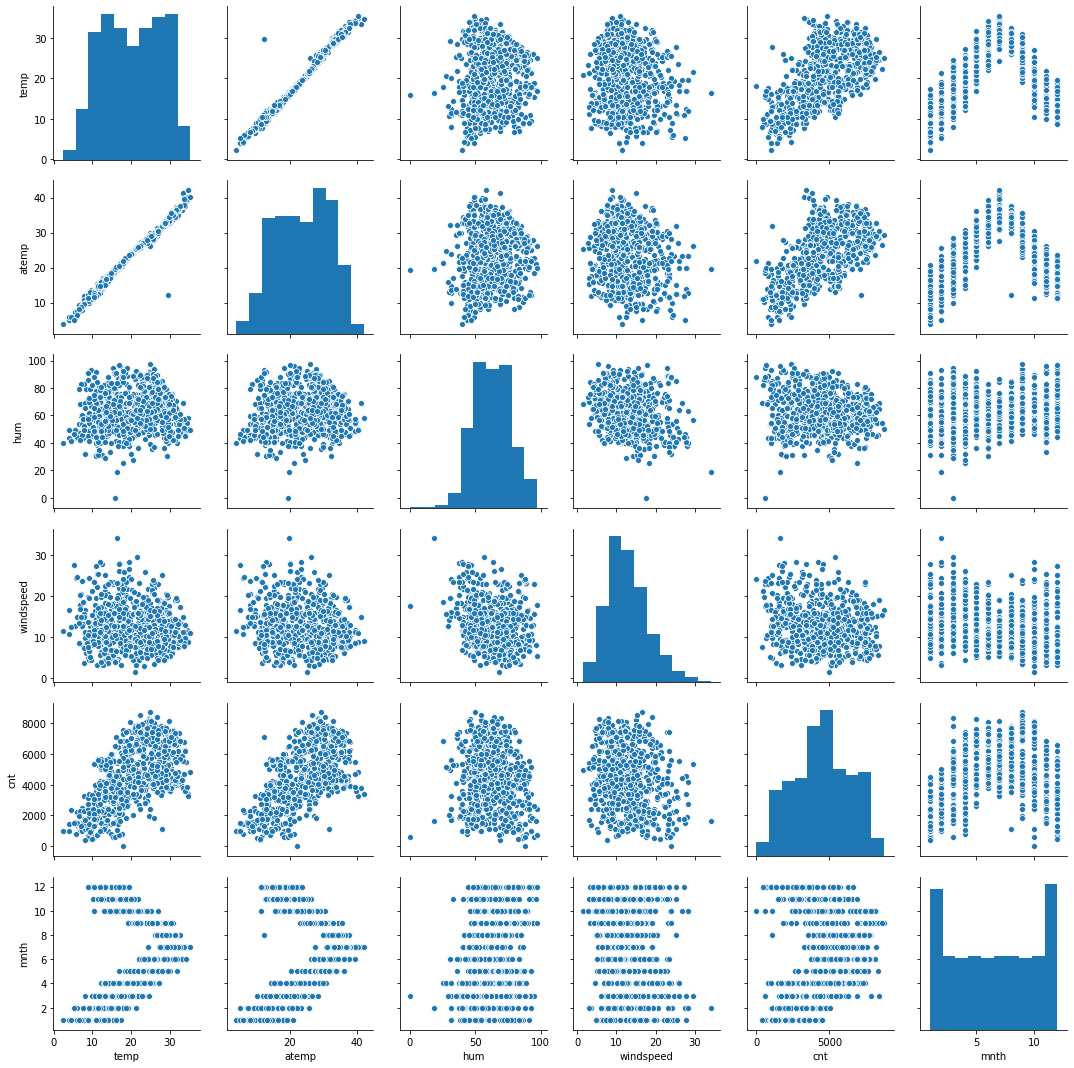

In [14]:
sns.pairplot(data, vars=['temp', 'atemp', 'hum', 'windspeed','cnt','mnth'])
plt.show()

#### Insight

Amongst the numerical variable Temprature and Atemp have the highest correlation with Count

#### Impact of Season on Count

In [15]:
data.groupby(["season"])["cnt"].sum()

season
1     469514
2     918589
3    1061129
4     841613
Name: cnt, dtype: int64

In [16]:
data.groupby(["mnth"])["cnt"].sum()

mnth
1     134933
2     149518
3     228920
4     269094
5     331686
6     346342
7     344948
8     351194
9     345991
10    322352
11    254831
12    211036
Name: cnt, dtype: int64

#### Insight

It can be seen that in Fall season the demand for bike sharing is the highest

#### Impact of WorkingDay/Weekday/Holiday on Bike Share demand

In [17]:
data.groupby(["holiday"])["cnt"].sum()

holiday
0    3212410
1      78435
Name: cnt, dtype: int64

In [18]:
data["holiday"].value_counts()

0    709
1     21
Name: holiday, dtype: int64

In [19]:
data.groupby(["weekday"])["cnt"].sum()

weekday
0    485235
1    447281
2    448822
3    462276
4    487923
5    478132
6    481176
Name: cnt, dtype: int64

In [20]:
data.groupby(["workingday"])["cnt"].sum()

workingday
0    1036857
1    2253988
Name: cnt, dtype: int64

#### Insight

The demand of bike service is high on working days

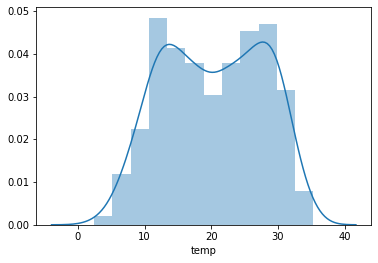

In [21]:
sns.distplot(data['temp'])
plt.show()

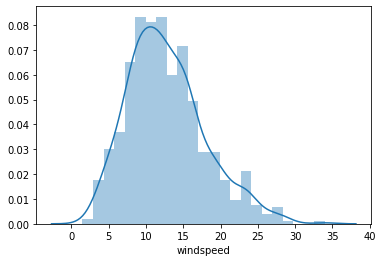

In [22]:
sns.distplot(data['windspeed'])
plt.show()

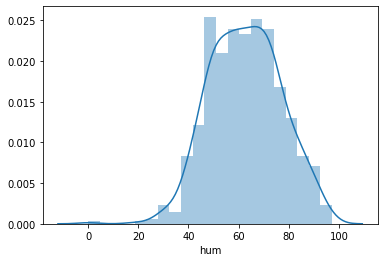

In [23]:
sns.distplot(data['hum'])
plt.show()

### 2. Data Cleaning

In [24]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

Everything looks in place and data has no missing values or imputation which needs to done

### 3. Data preparation

#### Handling Categorical variable

In [25]:
data["season"]=data["season"].map({1:"spring", 2:"summer", 3:"fall", 4:"winter"})
data["weathersit"]=data["weathersit"].map({1:"Partly Cloudy", 2:"cloudy", 3:"Light Rain", 4:"Heavy Rain"})
#data["weekday"]=data["weekday"].map({0:"Sun", 1:"Mon", 2:"Tue", 3:"Wed",4:"Thu",5:"Fri",6:"Sat"})
#data["mnth"]=data["mnth"].map({1:"Jan", 2:"Feb", 3:"March", 4:"Apr",5:"May",6:"Jun",7:"July",8:"Aug",9:"Sept",10:"Oct",11:"Nov",12:"Dec"})

In [26]:
data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [27]:
data.groupby(["season"])["cnt"].sum()

season
fall      1061129
spring     469514
summer     918589
winter     841613
Name: cnt, dtype: int64

In [28]:
data.groupby(["weathersit"])["cnt"].sum()

weathersit
Light Rain         37869
Partly Cloudy    2257952
cloudy            995024
Name: cnt, dtype: int64

#### Insight:
The demand of shared Bike is high on Partly Cloudy/Clear Weather. Also, there is not demand on heavy Rainy weather.


In [29]:
data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,spring,0,1,0,1,1,cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,spring,0,1,0,2,1,cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,spring,0,1,0,3,1,Partly Cloudy,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,spring,0,1,0,4,1,Partly Cloudy,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,spring,0,1,0,5,1,Partly Cloudy,9.305237,11.46350,43.6957,12.522300,82,1518,1600


#### Creating Dummies

In [30]:
season = pd.get_dummies(data['season'],drop_first=True)
weathersit = pd.get_dummies(data['weathersit'],drop_first=True)
#mnth = pd.get_dummies(data['mnth'],drop_first=True)
data=pd.concat([data,season],axis=1)
data=pd.concat([data,weathersit],axis=1)
#data=pd.concat([data,mnth],axis=1)

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 21 columns):
instant          730 non-null int64
dteday           730 non-null object
season           730 non-null object
yr               730 non-null int64
mnth             730 non-null int64
holiday          730 non-null int64
weekday          730 non-null int64
workingday       730 non-null int64
weathersit       730 non-null object
temp             730 non-null float64
atemp            730 non-null float64
hum              730 non-null float64
windspeed        730 non-null float64
casual           730 non-null int64
registered       730 non-null int64
cnt              730 non-null int64
spring           730 non-null uint8
summer           730 non-null uint8
winter           730 non-null uint8
Partly Cloudy    730 non-null uint8
cloudy           730 non-null uint8
dtypes: float64(4), int64(9), object(3), uint8(5)
memory usage: 94.9+ KB


Dropping unwanted or redundant variables

In [32]:
data.drop(["season","weathersit","instant","dteday","casual","registered","mnth"],axis=1,inplace=True)
data.head(3)

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Partly Cloudy,cloudy
0,0,0,1,1,14.110847,18.18125,80.5833,10.749882,985,1,0,0,0,1
1,0,0,2,1,14.902598,17.68695,69.6087,16.652113,801,1,0,0,0,1
2,0,0,3,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,0,1,0


### 3. Model Building and Evaluation
Let's start building the model. The first step to model building is the usual test-train split. So let's perform that

#### Train Test Split

In [33]:
df_train,df_test= train_test_split(data, train_size=0.7,random_state=100)

#### Scaling

Now that we have done the test-train split, we need to scale the variables for better interpretability. But we only need the scale the numeric columns and not the dummy variables. Let's take a look at the list of numeric variables we had created in the beginning. Also, the scaling has to be done only on the train dataset as you don't want it to learn anything from the test data.

In [34]:
df_train.columns.intersection(data_numeric.columns)

Index(['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp', 'hum',
       'windspeed', 'cnt'],
      dtype='object')

In [35]:
scaler=MinMaxScaler()
var=['yr', 'holiday', 'weekday', 'workingday', 'temp', 'atemp','hum', 'windspeed',]
df_train[var]=scaler.fit_transform(df_train[var])
df_train.head(2)

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,spring,summer,winter,Partly Cloudy,cloudy
576,1.0,0.0,0.5,1.0,0.815169,0.766351,0.725633,0.264686,7216,0,0,0,1,0
426,1.0,0.0,0.0,0.0,0.442393,0.438975,0.640189,0.255342,4066,1,0,0,0,1


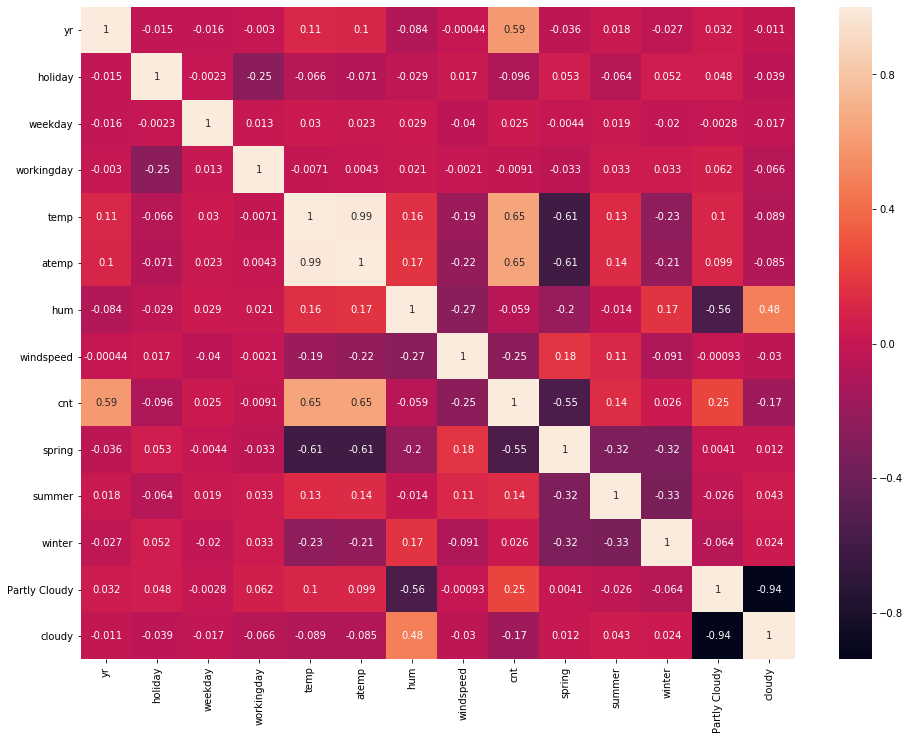

In [36]:
plt.figure(figsize=(16,12))
sns.heatmap(df_train.corr(),annot=True)

### Train Dataset

In [37]:
y_train= df_train.pop("cnt")
X_train=df_train

#### Building the first model with all the features

In [38]:
lm = LinearRegression()

# Fit a line
lm.fit(X_train, y_train)
y_pred = lm.predict(X_train)


from sklearn.metrics import r2_score
r2_score(y_train, y_pred)

0.8289561753829887

### Feature Selection Technique -RFE

Now, you have many features. It is obviously not possible to manually eliminate these features. So let's now build a model using recursive feature elimination to select features. We'll first start off with an arbitrary number of features (15 seems to be a good number to begin with), and then use the statsmodels library to build models using the shortlisted features (this is also because SKLearn doesn't have Adjusted R-squared that statsmodels has).

#### RFE with top 15 Variables/Features

In [39]:
lr1=LinearRegression()
rfe1=RFE(lr1,15)
rfe1.fit(X_train,y_train)

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=15, step=1, verbose=0)

In [40]:
list(zip(X_train.columns,rfe1.support_,rfe1.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('weekday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('spring', True, 1),
 ('summer', True, 1),
 ('winter', True, 1),
 ('Partly Cloudy', True, 1),
 ('cloudy', True, 1)]

In [41]:
cols=X_train.columns[rfe1.support_]
X_train=X_train[cols]

In [42]:
X_train_sm=sm.add_constant(X_train)
linearRegression1= sm.OLS(y_train,X_train_sm)
lr_model1=linearRegression1.fit()
lr_model1.params

const             498.004353
yr               2007.925253
holiday          -875.004780
weekday           153.516625
workingday       -174.616196
temp             3759.055997
atemp             546.899894
hum             -1180.239984
windspeed       -1546.766594
spring           -671.091052
summer            364.962192
winter            748.555006
Partly Cloudy    2115.512393
cloudy           1642.089564
dtype: float64

In [43]:
lr_model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     184.9
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.28e-180
Time:                        21:08:05   Log-Likelihood:                -4136.6
No. Observations:                 510   AIC:                             8301.
Df Residuals:                     496   BIC:                             8360.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           498.0044    429.830      1.159      0.247    -346.508    1342.517
yr             2007.9253     73.571     27.292      0.000    1863.376    2152.475
holiday        -875.0048    239.377     -3.655      0.000   -1345.322    -404.687
weekday         153.5166    110.572      1.388      0.166     -63.730     370.763
workingday     -174.6162     83.455     -2.092      0.037    -338.585     -10.648
temp           3759.0560   1224.763      3.069      0.002    1352.692    6165.420
atemp           546.8999   1250.755      0.437      0.662   -1910.531    3004.330
hum           -1180.2400    340.476     -3.466      0.001   -1849.193    -511.287
windspeed     -1546.7666    237.971     -6.500      0.000   -2014.323   -1079.211
spring         -671.0911    181.252     -3.703      0.000   -1027.208    -314.974
summer          364.9622    122.967      2.968      0.003     123.362     606.562
winter          748.5550    150.289      4.981      0.000     453.274    1043.836
Partly Cloudy  2115.5124    239.628      8.828      0.000    1644.702    2586.323
cloudy         1642.0896    227.074      7.232      0.000    1195.943    2088.236
==============================================================================
Omnibus:                       67.085   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              162.613
Skew:                          -0.685   Prob(JB):                     4.89e-36
Kurtosis:                       5.404   Cond. No.                         94.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Checking Multi- collinearity using VIF

In [44]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif["features"]=X_train.columns
vif["Vif-Factor"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["Vif-Factor"]=round(vif["Vif-Factor"],2)
vif=vif.sort_values(by='Vif-Factor',ascending=False)
vif

,features,Vif-Factor
4,temp,381.51
5,atemp,367.33
6,hum,24.72
11,Partly Cloudy,14.37
12,cloudy,8.75
8,spring,5.14
7,windspeed,4.89
10,winter,3.76
3,workingday,3.75
2,weekday,3.21


#### RFE with top 10 Features

In [45]:
lr2=LinearRegression()
rfe2=RFE(lr2,10)
rfe2.fit(X_train,y_train)
cols=X_train.columns[rfe2.support_]
X_train=X_train[cols]
X_train_sm=sm.add_constant(X_train)
linearRegression2= sm.OLS(y_train,X_train_sm)
lr_model2=linearRegression2.fit()
lr_model2.params

const             487.911370
yr               2005.314305
holiday          -747.302348
temp             4311.211495
hum             -1221.883459
windspeed       -1590.454207
spring           -650.711307
summer            375.128758
winter            757.014994
Partly Cloudy    2082.543975
cloudy           1628.900875
dtype: float64

In [46]:
lr_model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     238.2
Date:                Mon, 10 May 2021   Prob (F-statistic):          8.27e-183
Time:                        21:08:06   Log-Likelihood:                -4139.8
No. Observations:                 510   AIC:                             8302.
Df Residuals:                     499   BIC:                             8348.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const           487.9114    424.128      1.150      0.251    -345.385    1321.208
yr             2005.3143     73.790     27.176      0.000    1860.336    2150.292
holiday        -747.3023    231.802     -3.224      0.001   -1202.731    -291.874
temp           4311.2115    301.143     14.316      0.000    3719.548    4902.875
hum           -1221.8835    340.369     -3.590      0.000   -1890.616    -553.151
windspeed     -1590.4542    233.825     -6.802      0.000   -2049.858   -1131.050
spring         -650.7113    180.437     -3.606      0.000   -1005.221    -296.202
summer          375.1288    120.970      3.101      0.002     137.454     612.803
winter          757.0150    148.137      5.110      0.000     465.966    1048.064
Partly Cloudy  2082.5440    239.341      8.701      0.000    1612.304    2552.784
cloudy         1628.9009    226.995      7.176      0.000    1182.918    2074.884
==============================================================================
Omnibus:                       63.872   Durbin-Watson:                   2.026
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.401
Skew:                          -0.644   Prob(JB):                     2.43e-35
Kurtosis:                       5.417   Cond. No.                         25.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [47]:
vif=pd.DataFrame()
vif["features"]=X_train.columns
vif["Vif-Factor"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["Vif-Factor"]=round(vif["Vif-Factor"],2)
vif=vif.sort_values(by='Vif-Factor',ascending=False)
vif

,features,Vif-Factor
3,hum,23.68
2,temp,20.15
8,Partly Cloudy,13.97
9,cloudy,8.69
5,spring,5.02
4,windspeed,4.60
7,winter,3.62
6,summer,2.54
0,yr,2.09
1,holiday,1.04


#### Insight

VIF of humidity is quite high so , need to drop Humidity

In [48]:
X_train.drop("hum",inplace=True,axis=1)

In [49]:
X_train_sm=sm.add_constant(X_train)
linearRegression= sm.OLS(y_train,X_train_sm)
lr_model=linearRegression.fit()
lr_model.params

const            -467.228018
yr               2034.769335
holiday          -757.803780
temp             4052.353259
windspeed       -1343.754259
spring           -718.856378
summer            331.988348
winter            647.813509
Partly Cloudy    2420.647096
cloudy           1768.925072
dtype: float64

In [50]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     257.1
Date:                Mon, 10 May 2021   Prob (F-statistic):          2.84e-181
Time:                        21:08:06   Log-Likelihood:                -4146.3
No. Observations:                 510   AIC:                             8313.
Df Residuals:                     500   BIC:                             8355.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          -467.2280    334.197     -1.398      0.163   -1123.832     189.376
yr             2034.7693     74.199     27.423      0.000    1888.989    2180.550
holiday        -757.8038    234.523     -3.231      0.001   -1218.575    -297.032
temp           4052.3533    295.837     13.698      0.000    3471.115    4633.591
windspeed     -1343.7543    226.140     -5.942      0.000   -1788.056    -899.452
spring         -718.8564    181.556     -3.959      0.000   -1075.563    -362.150
summer          331.9883    121.795      2.726      0.007      92.696     571.281
winter          647.8135    146.694      4.416      0.000     359.602     936.025
Partly Cloudy  2420.6471    222.631     10.873      0.000    1983.239    2858.055
cloudy         1768.9251    226.261      7.818      0.000    1324.385    2213.465
==============================================================================
Omnibus:                       62.352   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.141
Skew:                          -0.634   Prob(JB):                     5.57e-34
Kurtosis:                       5.366   Cond. No.                         20.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
vif=pd.DataFrame()
vif["features"]=X_train.columns
vif["Vif-Factor"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["Vif-Factor"]=round(vif["Vif-Factor"],2)
vif=vif.sort_values(by='Vif-Factor',ascending=False)
vif

,features,Vif-Factor
7,Partly Cloudy,13.88
2,temp,11.54
8,cloudy,7.78
3,windspeed,4.58
4,spring,3.75
6,winter,2.40
5,summer,2.22
0,yr,2.07
1,holiday,1.04


#### Insight 
VIF of partly cloudy is still >5 

In [52]:
X_train.drop("Partly Cloudy",inplace=True,axis=1)
X_train_sm=sm.add_constant(X_train)
linearRegression= sm.OLS(y_train,X_train_sm)
lr_model=linearRegression.fit()
lr_model.params

const        1818.924105
yr           2081.369654
holiday      -649.705093
temp         4160.513774
windspeed   -1587.959245
spring       -629.827549
summer        383.324115
winter        584.860430
cloudy       -540.641017
dtype: float64

In [53]:
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.780
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     222.4
Date:                Mon, 10 May 2021   Prob (F-statistic):          1.70e-159
Time:                        21:08:07   Log-Likelihood:                -4200.4
No. Observations:                 510   AIC:                             8419.
Df Residuals:                     501   BIC:                             8457.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1818.9241    288.558      6.303      0.000    1251.991    2385.857
yr          2081.3697     82.286     25.294      0.000    1919.701    2243.038
holiday     -649.7051    260.284     -2.496      0.013   -1161.087    -138.323
temp        4160.5138    328.443     12.667      0.000    3515.218    4805.809
windspeed  -1587.9592    249.964     -6.353      0.000   -2079.066   -1096.852
spring      -629.8275    201.475     -3.126      0.002   -1025.667    -233.988
summer       383.3241    135.193      2.835      0.005     117.709     648.939
winter       584.8604    162.827      3.592      0.000     264.953     904.767
cloudy      -540.6410     86.574     -6.245      0.000    -710.733    -370.549
==============================================================================
Omnibus:                      120.175   Durbin-Watson:                   2.024
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              403.147
Skew:                          -1.069   Prob(JB):                     2.87e-88
Kurtosis:                       6.795   Cond. No.                         16.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
vif=pd.DataFrame()
vif["features"]=X_train.columns
vif["Vif-Factor"]=[variance_inflation_factor(X_train.values,i) for i in range(X_train.shape[1])]
vif["Vif-Factor"]=round(vif["Vif-Factor"],2)
vif=vif.sort_values(by='Vif-Factor',ascending=False)
vif

,features,Vif-Factor
3,windspeed,4.53
2,temp,3.56
0,yr,2.06
4,spring,1.95
5,summer,1.80
6,winter,1.59
7,cloudy,1.51
1,holiday,1.04


In [55]:
list(zip(X_train.columns,rfe2.support_,rfe2.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('temp', False, 4),
 ('windspeed', False, 3),
 ('spring', True, 1),
 ('summer', False, 2),
 ('winter', True, 1),
 ('cloudy', True, 1)]

#### Conclusion

At this point the R2 and Adjusted R2 are good enough and quite close. The P-value are within significance level 
and VIF's are also under 5.

### Residual Analysis

Before we make predictions on the test set, let's first analyse the residuals.

Text(0.5, 1.0, 'Residual Plot')

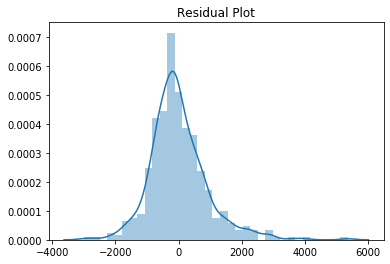

In [56]:
y_train_pred=lr_model.predict(X_train_sm)
res_train= y_train_pred - y_train
sns.distplot(res_train)
plt.title("Residual Plot")

The error terms are fairly normally distributed and we can surely live with this. Let's now make predictions on the test-set.

#### Q-Q PLOT

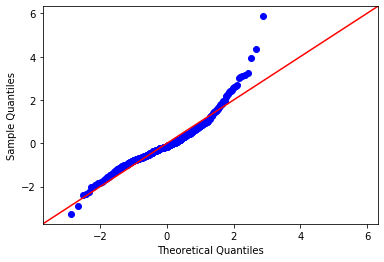

In [57]:
fig = sm.qqplot(res_train, fit=True, line="45")

### Making Predictions
We would first need to scale the test set as well. So let's start with that.

In [58]:
df_test[var]=scaler.transform(df_test[var])
y_test = df_test.pop("cnt")
X_test = df_test


In [59]:
X_test.head()

,yr,holiday,weekday,workingday,temp,atemp,hum,windspeed,spring,summer,winter,Partly Cloudy,cloudy
184,0.0,1.0,0.500000,0.0,0.831783,0.769660,0.657364,0.084219,0,0,0,0,1
535,1.0,0.0,0.666667,1.0,0.901354,0.842587,0.610133,0.153728,0,1,0,1,0
299,0.0,0.0,1.000000,0.0,0.511964,0.496145,0.837699,0.334206,0,0,1,0,1
221,0.0,0.0,0.833333,1.0,0.881625,0.795343,0.437098,0.339570,0,0,0,1,0
152,0.0,0.0,1.000000,0.0,0.817246,0.741471,0.314298,0.537414,0,1,0,1,0


In [60]:
cols=X_test.columns[rfe2.support_]

In [61]:
cols

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'spring', 'summer',
       'winter', 'Partly Cloudy', 'cloudy'],
      dtype='object')

In [62]:
X_test=X_test[cols]
X_test.drop("hum",inplace=True,axis=1)

In [63]:
X_test.drop("Partly Cloudy",inplace=True,axis=1)

In [64]:
X_test_sm= sm.add_constant(X_test)
y_test_pred=lr_model.predict(X_test_sm)

Text(0, 0.5, 'y_test_pred')

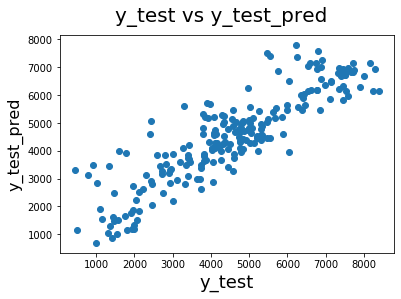

In [65]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16)  

From the above plot, it's evident that the model is doing well on the test set as well. Let's also check the R-squared and more importantly, the adjusted R-squared value for the test set.

In [66]:
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7749308360928321

### Comparing R2 score on test and train

In [67]:
from sklearn.metrics import r2_score
r2_score(y_true=y_test,y_pred=y_test_pred)

0.7749308360928321

In [68]:
r2_score(y_true=y_train,y_pred=y_train_pred)

0.7803114177308521

#### Conclusion 
The results of test and train are comparable and not much deviation R2 value. Hence, this a decent fit and not a over/under fit

#### Checking the correlations between the final predictor variables

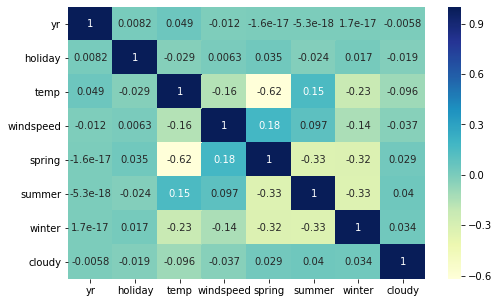

In [69]:
# Figure size
plt.figure(figsize=(8,5))

cols=X_test.columns
# Heatmap
sns.heatmap(data[cols].corr(), cmap="YlGnBu", annot=True)
plt.show()

Thus, for now, the final model consists of the 8 variables mentioned above.